In [1]:
import pandas as pd
df = pd.read_csv('/Users/vanhome/Downloads/EEG.machinelearing_data_BRMH.csv')
print(df.head)

import numpy as np
data_array = df.to_numpy()
np.save('data_array.npy', data_array)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<bound method NDFrame.head of      no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0    Alcohol use disorder         3

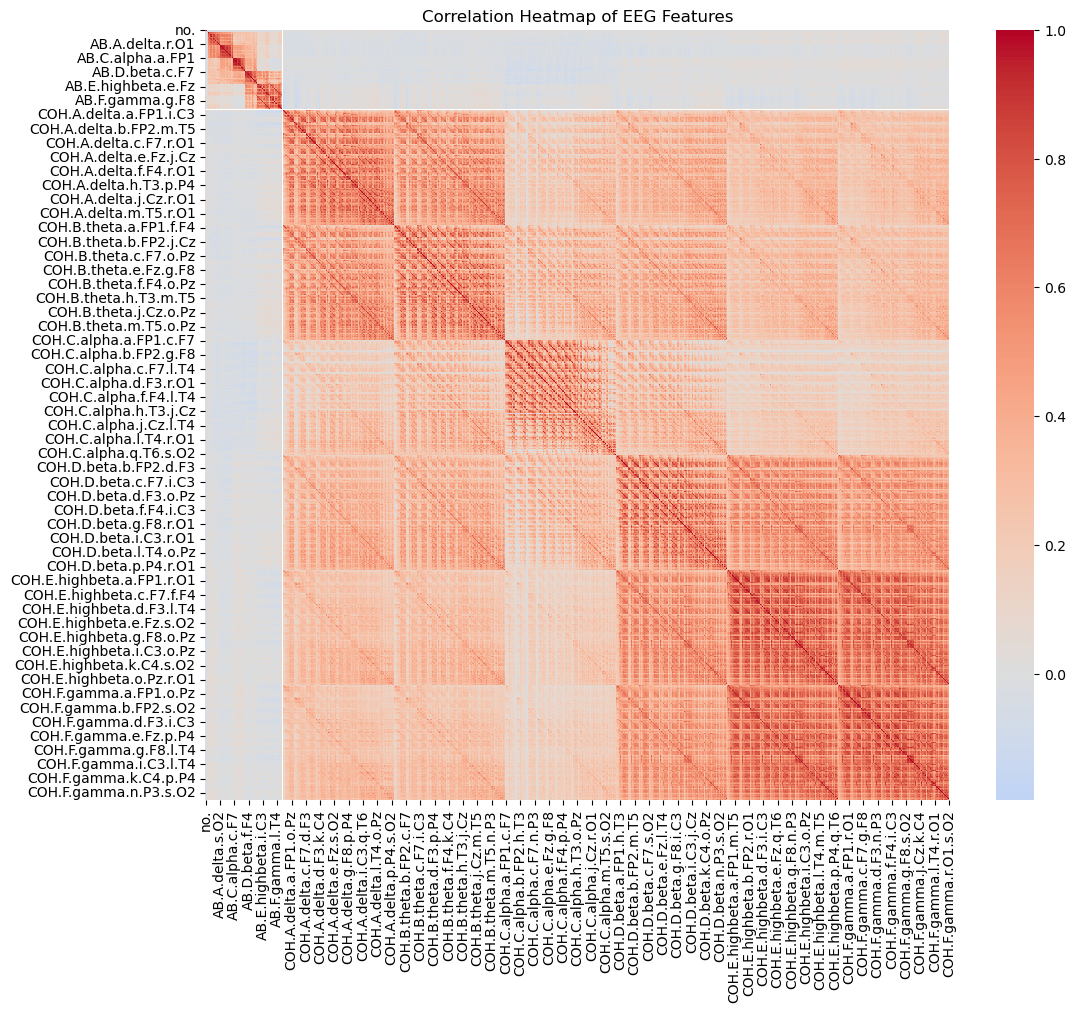

In [2]:
eeg_features = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(eeg_features.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of EEG Features')
plt.show()

In [3]:
# Calculate correlation matrix and find strong pairs
corr_matrix = df.select_dtypes(include='number').corr().abs()

# Find pairs with correlation > 0.95 (excluding self-correlations)
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'})
)

print(high_corr_pairs.sort_values(by='correlation', ascending=False).head(50))

                        feature_1                  feature_2  correlation
47145            AB.C.alpha.a.FP1           AB.C.alpha.b.FP2     0.993751
470493      COH.C.alpha.e.Fz.r.O1      COH.C.alpha.f.F4.r.O1     0.989353
51543             AB.C.alpha.e.Fz            AB.C.alpha.f.F4     0.989344
431701     COH.C.alpha.a.FP1.s.O2     COH.C.alpha.b.FP2.s.O2     0.989103
471098      COH.C.alpha.e.Fz.s.O2      COH.C.alpha.f.F4.s.O2     0.987893
431034     COH.C.alpha.a.FP1.r.O1     COH.C.alpha.b.FP2.r.O1     0.987865
461919      COH.C.alpha.d.F3.r.O1      COH.C.alpha.e.Fz.r.O1     0.986223
50445             AB.C.alpha.d.F3            AB.C.alpha.e.Fz     0.985618
619092   COH.E.highbeta.e.Fz.r.O1   COH.E.highbeta.f.F4.r.O1     0.985123
50446             AB.C.alpha.d.F3            AB.C.alpha.f.F4     0.984942
649530      COH.F.gamma.e.Fz.r.O1      COH.F.gamma.f.F4.r.O1     0.983756
467453      COH.C.alpha.e.Fz.m.T5      COH.C.alpha.f.F4.m.T5     0.983400
619355   COH.E.highbeta.e.Fz.s.O2   CO

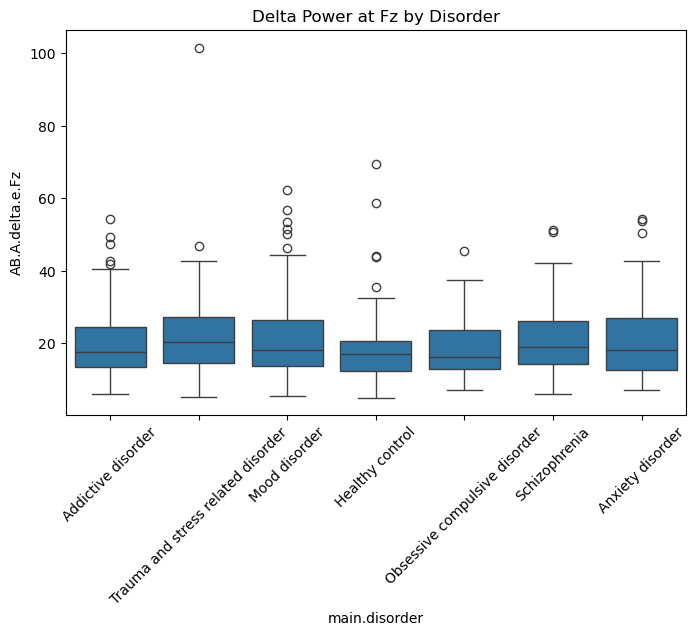

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='main.disorder', y='AB.A.delta.e.Fz', data=df)
plt.xticks(rotation=45)
plt.title('Delta Power at Fz by Disorder')
plt.show()

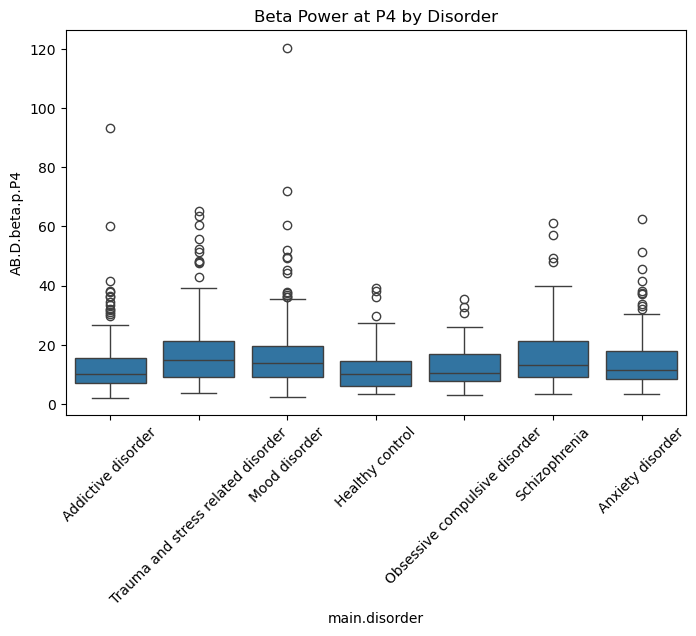

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='main.disorder', y='AB.D.beta.p.P4', data=df)
plt.xticks(rotation=45)
plt.title('Beta Power at P4 by Disorder')
plt.show()

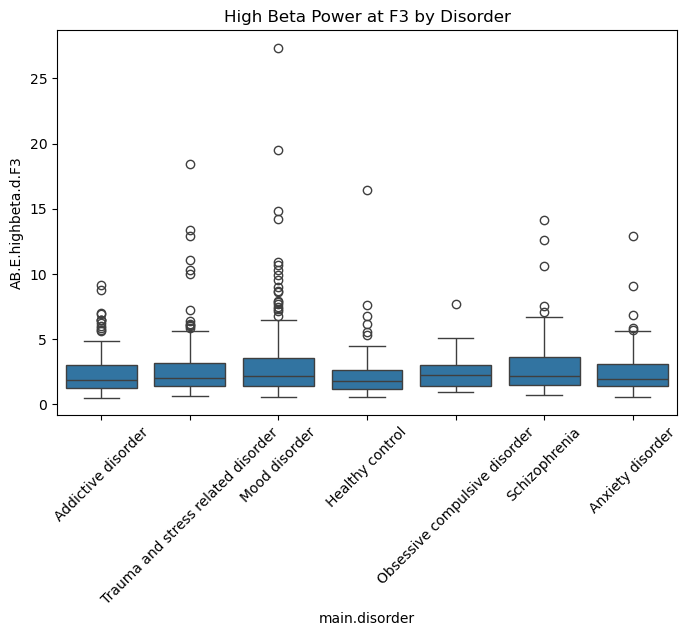

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='main.disorder', y='AB.E.highbeta.d.F3', data=df)
plt.xticks(rotation=45)
plt.title('High Beta Power at F3 by Disorder')
plt.show()

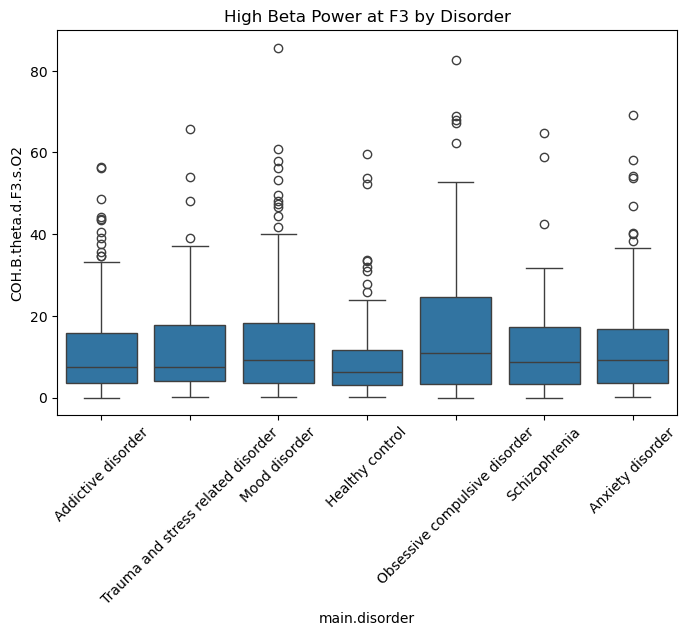

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='main.disorder', y='COH.B.theta.d.F3.s.O2', data=df)
plt.xticks(rotation=45)
plt.title('High Beta Power at F3 by Disorder')
plt.show()

/Users/vanhome/miniforge3/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Unnamed: 122']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


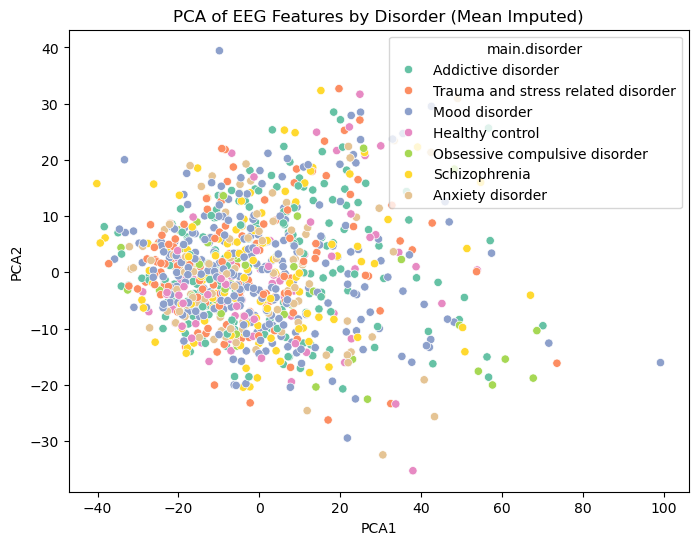

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_scaled = StandardScaler().fit_transform(X_imputed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='main.disorder', data=df, palette='Set2')
plt.title('PCA of EEG Features by Disorder (Mean Imputed)')
plt.show()

In [9]:
print(pca.explained_variance_ratio_)

[0.33470894 0.09512368]
